In [1]:
cd 13510

In [2]:
punlearn mkregmap
plist mkregmap
/bin/rm -rf mkregmap
mkdir mkregmap


Parameters for /home/kjg/cxcds_param4/mkregmap.par

        infile =                  Input image file
       regions =                  Input stack of regions
       outfile =                  Output map file
       (binimg = )                Output binned image
        (coord = sky)             Image coodinate name
      (clobber = no)              Remove outfile if it already exists?
      (verbose = 1)               Tool chatter level
         (mode = ql)              



In [3]:
get_sky_limits img.fits 

Running: get_sky_limits
  version: 07 October 2016
Checking binning of image: img.fits
  Image has 865 x 858 pixels
  Pixel size is 1.0 by 1.0
  Lower left (0.5,0.5) corner is x,y= 3595.5, 3942.5
  Upper right (865.5,858.5) corner is x,y= 4460.5, 4800.5
  DM filter is:
    x=3595.5:4460.5:#865,y=3942.5:4800.5:#858
  mkexpmap xygrid value is:
    3595.5:4460.5:#865,3942.5:4800.5:#858


In [4]:
time mkregmap \
  infile=img.fits \
  outfile=mkregmap/rgrid.map \
  binimg=mkregmap/rgrid.img \
  regions="rgrid(3595.5:4460.5:50,3942.5:4800.5:50)" \
  clob+

mkregmap
          infile = img.fits
         regions = rgrid(3595.5:4460.5:50,3942.5:4800.5:50)
         outfile = mkregmap/rgrid.map
          binimg = mkregmap/rgrid.img
           coord = sky
         clobber = yes
         verbose = 1
            mode = ql


real	0m9.572s
user	0m8.908s
sys	0m0.654s


In [5]:
dmimggrad mkregmap/rgrid.map mkregmap/rgrid.grad sobel mag clob+

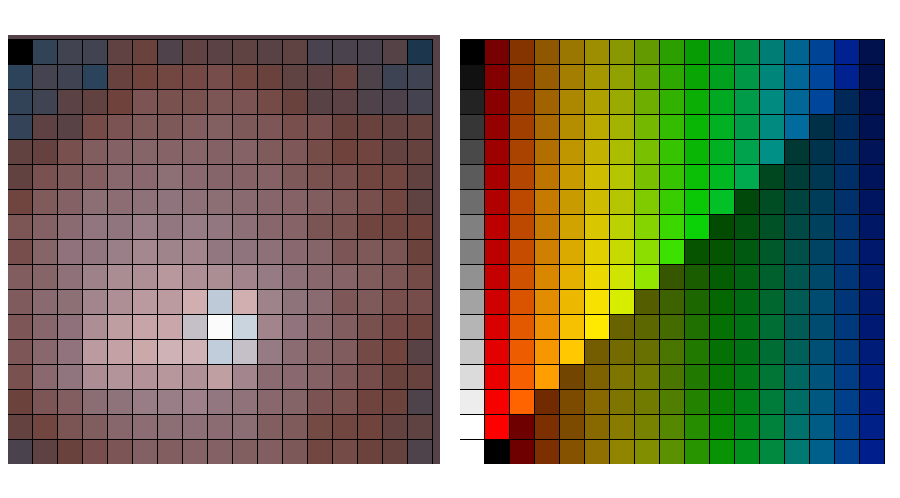

In [6]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mkregmap/rgrid.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask mkregmap/rgrid.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  mkregmap/rgrid.map -scale linear \
  -region delete all \
  -mask color black -mask mkregmap/rgrid.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png mkregmap/rgrid.abin.png -quit

display < mkregmap/rgrid.abin.png

In [7]:
punlearn dmstat
dmstat img.fits"[sky=circle(4024,4232,100)]" cen+ clip+

abell1775_broad_thresh.img.fill_IMAGE(x, y)
    min:	0 	      @:	( 4024 4132 )
    max:	7 	      @:	( 4039 4207 )
cntrd[log] :	( 100.19597819 92.563962736 )
cntrd[phys]:	( 4023.1959782 4223.5639627 )
sigma_cntrd:	( 81.505644473 76.61361709 )
   good:	31417 
   null:	8984 


In [8]:
time mkregmap \
  infile=img.fits \
  outfile=mkregmap/pgrid.map \
  binimg=mkregmap/pgrid.img \
  regions="pgrid(4023,4223,0:1000:50,0:360:30)" \
  clob+

mkregmap
          infile = img.fits
         regions = pgrid(4023,4223,0:1000:50,0:360:30)
         outfile = mkregmap/pgrid.map
          binimg = mkregmap/pgrid.img
           coord = sky
         clobber = yes
         verbose = 1
            mode = ql


real	0m18.133s
user	0m17.312s
sys	0m0.813s


In [9]:
dmimggrad mkregmap/pgrid.map mkregmap/pgrid.grad sobel mag clob+

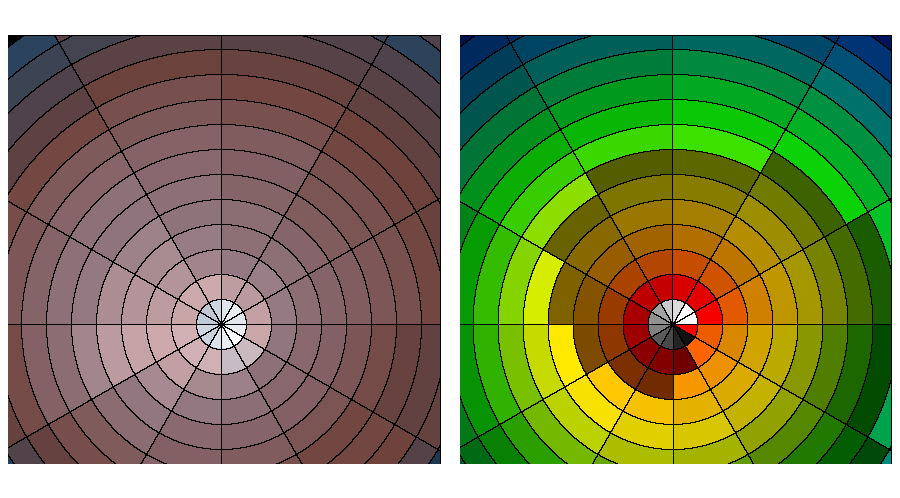

In [10]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mkregmap/pgrid.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask mkregmap/pgrid.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  mkregmap/pgrid.map -scale linear \
  -region delete all \
  -mask color black -mask mkregmap/pgrid.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png mkregmap/pgrid.abin.png -quit

display < mkregmap/pgrid.abin.png

In [11]:
punlearn dmellipse
dmellipse \
  infile=img.fits \
  outfile=mkregmap/ellipses.reg \
  fraction="lgrid(0.05:0.951:0.05)" \
  step=100 \
  x_cen=4023 y_cen=4223 fix_cen+ \
  mode=h clob+

In [12]:
dmlist mkregmap/ellipses.reg counts

19      


In [13]:
time mkregmap \
  infile=img.fits \
  outfile=mkregmap/ellipse.map \
  binimg=mkregmap/ellipse.img \
  regions="region(mkregmap/ellipses.reg[#row=igrid(1:19:1)])" \
  clob+

mkregmap
          infile = img.fits
         regions = region(mkregmap/ellipses.reg[#row=igrid(1:19:1)])
         outfile = mkregmap/ellipse.map
          binimg = mkregmap/ellipse.img
           coord = sky
         clobber = yes
         verbose = 1
            mode = ql


real	0m48.456s
user	0m47.194s
sys	0m1.183s


In [14]:
dmimggrad mkregmap/ellipse.map mkregmap/ellipse.grad sobel mag clob+

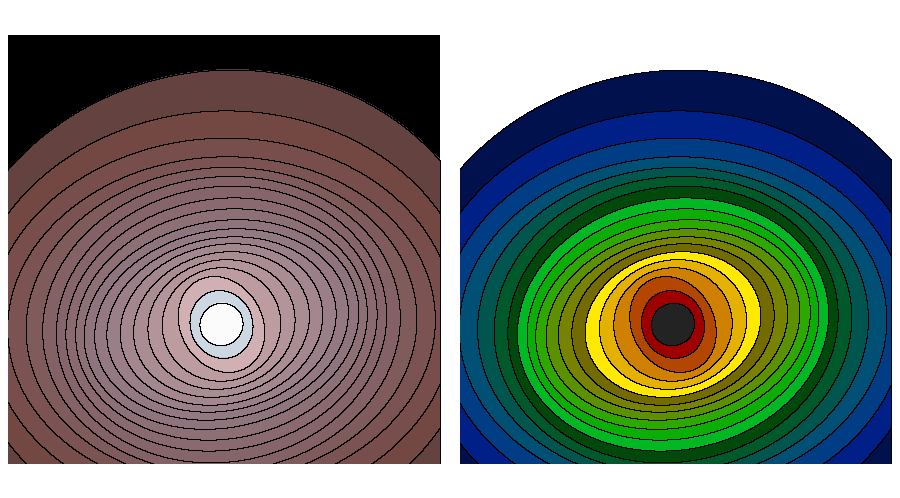

In [15]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mkregmap/ellipse.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask mkregmap/ellipse.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  mkregmap/ellipse.map -scale linear \
  -region delete all \
  -mask color black -mask mkregmap/ellipse.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png mkregmap/ellipse.abin.png -quit

display < mkregmap/ellipse.abin.png

In [16]:
aconvolve img.fits mkregmap/img.sm "lib:gaus(2,5,1,9,9)" method=slide edge=const const=0 clob+


In [17]:
dmstat mkregmap/img.sm cen- sig- med-

CONVOLVE
    min:	0.0062739137549 	      @:	( 4460 3943 )
    max:	1.3396139349 	      @:	( 4028 4226 )
   mean:	0.14120480164 
    sum:	104797.96763 
   good:	742170 
   null:	0 


In [18]:
dmcontour mkregmap/img.sm \
  levels=1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1 \
  out=mkregmap/contour.reg \
  clob+ mode=h

In [19]:
dmstat mkregmap/contour.reg"[cols component]" 

COMPONENT
    min:	1 	      @:	1 
    max:	33 	      @:	36 
   mean:	18.5 
  sigma:	9.9548982918 
    sum:	740 
   good:	40 
   null:	0 



In [20]:
time mkregmap \
  infile=img.fits \
  outfile=mkregmap/contour.map \
  binimg=mkregmap/contour.img \
  regions="region(mkregmap/contour.reg[component=igrid(1:34:1)])" \
  clob+
  

mkregmap
          infile = img.fits
         regions = region(mkregmap/contour.reg[component=igrid(1:34:1)])
         outfile = mkregmap/contour.map
          binimg = mkregmap/contour.img
           coord = sky
         clobber = yes
         verbose = 1
            mode = ql


real	0m22.351s
user	0m21.610s
sys	0m0.719s


In [21]:
dmimggrad mkregmap/contour.map mkregmap/contour.grad sobel mag clob+

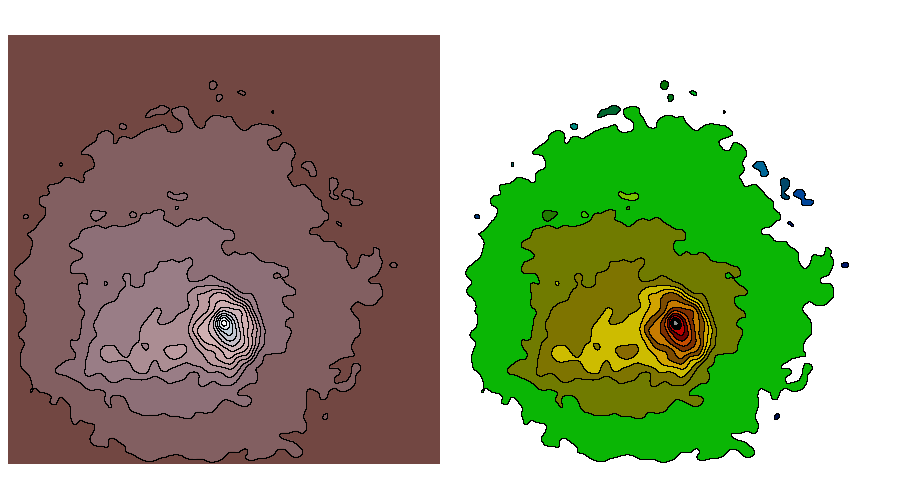

In [22]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mkregmap/contour.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask mkregmap/contour.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  mkregmap/contour.map -scale linear \
  -region delete all \
  -mask color black -mask mkregmap/contour.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png mkregmap/contour.abin.png -quit

display < mkregmap/contour.abin.png

No, don't have to use `*grid` syntax, any stack will do.

In [23]:
cat << EOM > mkregmap/triangles.py

from region import polygon, CXCRegion
import numpy as np
from ciao_contrib.runtool import get_sky_limits
sidelen=50

get_sky_limits("img.fits")
xx,yy = get_sky_limits.xygrid.split(",")
x0,xN = [float(a) for a in xx.split(":")[:-1]]
y0,yN = [float(a) for a in yy.split(":")[:-1]]

num_x = int(np.ceil((xN-x0)/sidelen))
num_y = int(np.ceil((yN-y0)/sidelen))

tri_x = np.array([0.0, 1.0, 0.0])*sidelen
tri_y = np.array([0.0, 0.0, 1.0])*sidelen

utri_x = np.array([0.0, 1.0, 1.0])*sidelen
utri_y = np.array([1.0, 1.0, 0.0])*sidelen

outreg = CXCRegion()
for yy in range(num_y):
    for xx in range(num_x):
        outreg = outreg + polygon(tri_x+xx*sidelen+x0, tri_y+yy*sidelen+y0)
        outreg = outreg + polygon(utri_x+xx*sidelen+x0, utri_y+yy*sidelen+y0)        

outreg.write("mkregmap/mypoly.reg", newline=True, clobber=True)
EOM

python mkregmap/triangles.py

In [24]:
time mkregmap \
  infile=img.fits \
  outfile=mkregmap/triangle.map \
  binimg=mkregmap/triangle.img \
  regions="@-mkregmap/mypoly.reg" \
  clob+
  

mkregmap
          infile = img.fits
         regions = @-mkregmap/mypoly.reg
         outfile = mkregmap/triangle.map
          binimg = mkregmap/triangle.img
           coord = sky
         clobber = yes
         verbose = 1
            mode = ql


real	0m16.995s
user	0m15.625s
sys	0m1.357s


In [25]:
dmimggrad mkregmap/triangle.map mkregmap/triangle.grad sobel mag clob+

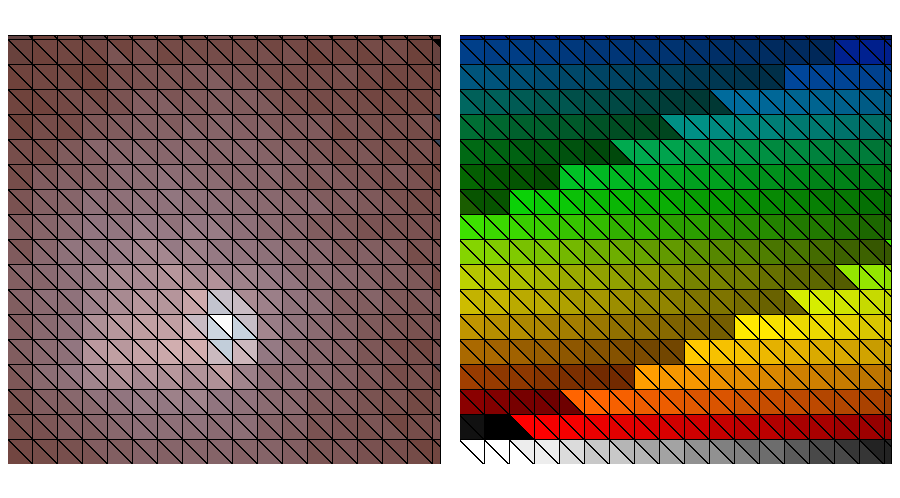

In [26]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  mkregmap/triangle.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask mkregmap/triangle.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  mkregmap/triangle.map -scale linear \
  -region delete all \
  -mask color black -mask mkregmap/triangle.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png mkregmap/triangle.abin.png -quit

display < mkregmap/triangle.abin.png